In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
# Load the dataset
file_path=r"D:\varam\project\DATA.xlsx"
df=pd.read_excel(file_path)
df

,IPC1,IPC2,IPC3,IAC1,IAC2,LLC1,LLC2,ISK1,ISK2,ISK3,...,IB3,IB4,IE1,IE2,IE3,ILR1,ILR2,GENDER,EDUCATIONAL QUALIFICATION,LABEL
0,99,93,95.0,96,95,82,84,81,93,86,...,88,99,96,89.0,96,88,84,NaN,P.hd,Excellent
1,45,52,56.0,53,48,59,47,46,46,44,...,46,57,56,57.0,59,57,54,Male,UG,Average
2,4,22,NaN,12,16,1,7,34,2,8,...,25,1,30,9.0,5,39,14,Male,PG,Poor
3,84,89,100.0,96,95,82,84,86,82,83,...,94,100,81,91.0,100,91,96,Male,P.hd,Excellent
4,67,72,66.0,66,71,68,65,75,72,71,...,62,62,74,76.0,74,66,65,Male,PG,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,90,94,88.0,91,86,91,100,96,94,98,...,88,98,93,88.0,85,86,84,Male,P.hd,Excellent
596,100,86,86.0,96,91,90,92,95,95,88,...,85,89,93,94.0,81,90,96,Male,P.hd,Excellent
597,76,61,73.0,79,69,69,80,65,65,68,...,66,77,63,79.0,70,72,70,Male,PG,Good
598,51,50,54.0,54,52,49,55,47,44,41,...,49,55,45,47.0,42,45,57,Female,UG,Average


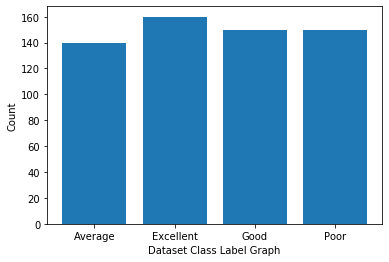

In [3]:
'LABEL' in df
unique, count = np.unique(df['LABEL'], return_counts = True)
height = count
bars = unique
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.show()

In [4]:
# Handle missing values of numerical data by filling with column mean
df.fillna(df.mean(numeric_only=True).round(0).astype(int), inplace=True)
df

,IPC1,IPC2,IPC3,IAC1,IAC2,LLC1,LLC2,ISK1,ISK2,ISK3,...,IB3,IB4,IE1,IE2,IE3,ILR1,ILR2,GENDER,EDUCATIONAL QUALIFICATION,LABEL
0,99,93,95.0,96,95,82,84,81,93,86,...,88,99,96,89.0,96,88,84,NaN,P.hd,Excellent
1,45,52,56.0,53,48,59,47,46,46,44,...,46,57,56,57.0,59,57,54,Male,UG,Average
2,4,22,59.0,12,16,1,7,34,2,8,...,25,1,30,9.0,5,39,14,Male,PG,Poor
3,84,89,100.0,96,95,82,84,86,82,83,...,94,100,81,91.0,100,91,96,Male,P.hd,Excellent
4,67,72,66.0,66,71,68,65,75,72,71,...,62,62,74,76.0,74,66,65,Male,PG,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,90,94,88.0,91,86,91,100,96,94,98,...,88,98,93,88.0,85,86,84,Male,P.hd,Excellent
596,100,86,86.0,96,91,90,92,95,95,88,...,85,89,93,94.0,81,90,96,Male,P.hd,Excellent
597,76,61,73.0,79,69,69,80,65,65,68,...,66,77,63,79.0,70,72,70,Male,PG,Good
598,51,50,54.0,54,52,49,55,47,44,41,...,49,55,45,47.0,42,45,57,Female,UG,Average


In [5]:
# Handle missing values of categorical data by filling with column mode
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)
df['EDUCATIONAL QUALIFICATION'].fillna(df['EDUCATIONAL QUALIFICATION'].mode()[0], inplace=True)
df

,IPC1,IPC2,IPC3,IAC1,IAC2,LLC1,LLC2,ISK1,ISK2,ISK3,...,IB3,IB4,IE1,IE2,IE3,ILR1,ILR2,GENDER,EDUCATIONAL QUALIFICATION,LABEL
0,99,93,95.0,96,95,82,84,81,93,86,...,88,99,96,89.0,96,88,84,Female,P.hd,Excellent
1,45,52,56.0,53,48,59,47,46,46,44,...,46,57,56,57.0,59,57,54,Male,UG,Average
2,4,22,59.0,12,16,1,7,34,2,8,...,25,1,30,9.0,5,39,14,Male,PG,Poor
3,84,89,100.0,96,95,82,84,86,82,83,...,94,100,81,91.0,100,91,96,Male,P.hd,Excellent
4,67,72,66.0,66,71,68,65,75,72,71,...,62,62,74,76.0,74,66,65,Male,PG,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,90,94,88.0,91,86,91,100,96,94,98,...,88,98,93,88.0,85,86,84,Male,P.hd,Excellent
596,100,86,86.0,96,91,90,92,95,95,88,...,85,89,93,94.0,81,90,96,Male,P.hd,Excellent
597,76,61,73.0,79,69,69,80,65,65,68,...,66,77,63,79.0,70,72,70,Male,PG,Good
598,51,50,54.0,54,52,49,55,47,44,41,...,49,55,45,47.0,42,45,57,Female,UG,Average


In [6]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ["GENDER", "EDUCATIONAL QUALIFICATION", "LABEL"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical to numeric
    label_encoders[col] = le
    
print("Encoded Dataset:\n")
df

Encoded Dataset:



,IPC1,IPC2,IPC3,IAC1,IAC2,LLC1,LLC2,ISK1,ISK2,ISK3,...,IB3,IB4,IE1,IE2,IE3,ILR1,ILR2,GENDER,EDUCATIONAL QUALIFICATION,LABEL
0,99,93,95.0,96,95,82,84,81,93,86,...,88,99,96,89.0,96,88,84,0,0,1
1,45,52,56.0,53,48,59,47,46,46,44,...,46,57,56,57.0,59,57,54,1,2,0
2,4,22,59.0,12,16,1,7,34,2,8,...,25,1,30,9.0,5,39,14,1,1,3
3,84,89,100.0,96,95,82,84,86,82,83,...,94,100,81,91.0,100,91,96,1,0,1
4,67,72,66.0,66,71,68,65,75,72,71,...,62,62,74,76.0,74,66,65,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,90,94,88.0,91,86,91,100,96,94,98,...,88,98,93,88.0,85,86,84,1,0,1
596,100,86,86.0,96,91,90,92,95,95,88,...,85,89,93,94.0,81,90,96,1,0,1
597,76,61,73.0,79,69,69,80,65,65,68,...,66,77,63,79.0,70,72,70,1,1,2
598,51,50,54.0,54,52,49,55,47,44,41,...,49,55,45,47.0,42,45,57,0,2,0


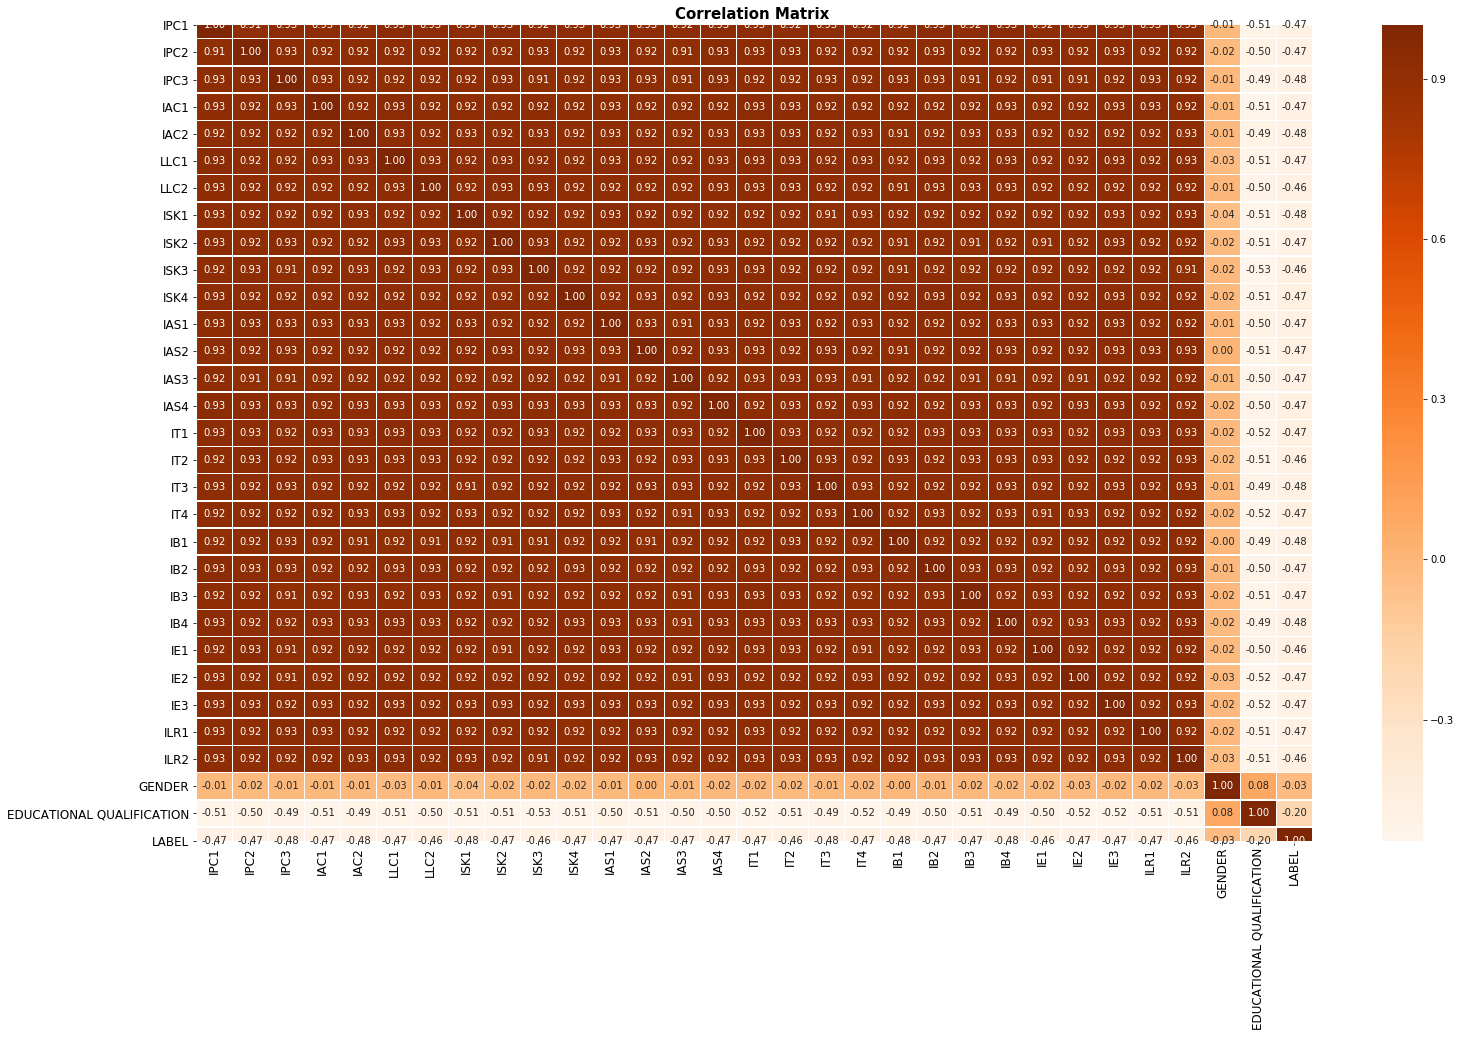

In [7]:

# Compute correlation matrix
correlation_matrix = df.corr()

# Set figure size for high clarity
plt.figure(figsize=(25, 15))  # Large figure for clear visualization

# Create Corelation  heatmap 
sns.heatmap(
    correlation_matrix, 
    annot=True,      # Show correlation values
    fmt=".2f",       # Format numbers to 3 decimal places
    cmap="Oranges",  # Purple color theme 
    linewidths=0.5,  # Add gridlines
    annot_kws={"size": 10},  # Increase font size of annotations
    cbar=True        # Show color bar
)

# Add title and adjust font sizes
plt.title("Correlation Matrix ", fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)  # Rotate x-axis labels
plt.yticks(fontsize=12, rotation=0)   # Keep y-axis labels straight

# Show the heatmap
plt.show()


In [8]:
# Compute correlation with target variable (LABEL)
correlation = df.corr()["LABEL"].abs().sort_values(ascending=False)

# Print features with low correlation (≤ 0.2)
low_correlation_features = correlation[correlation <= 0.2].index.tolist()
print("\nFeatures with low correlation (≤ 0.2) with LABEL:\n", low_correlation_features)



Features with low correlation (≤ 0.2) with LABEL:
 ['GENDER']


In [9]:
# Remove low-correlation features from dataset
df_filtered = df.drop(columns=low_correlation_features)

# Print updated dataset after feature selection
print("\nUpdated Dataset after Removing Low-Correlation Features:\n")
df_filtered


Updated Dataset after Removing Low-Correlation Features:



,IPC1,IPC2,IPC3,IAC1,IAC2,LLC1,LLC2,ISK1,ISK2,ISK3,...,IB2,IB3,IB4,IE1,IE2,IE3,ILR1,ILR2,EDUCATIONAL QUALIFICATION,LABEL
0,99,93,95.0,96,95,82,84,81,93,86,...,92,88,99,96,89.0,96,88,84,0,1
1,45,52,56.0,53,48,59,47,46,46,44,...,58,46,57,56,57.0,59,57,54,2,0
2,4,22,59.0,12,16,1,7,34,2,8,...,1,25,1,30,9.0,5,39,14,1,3
3,84,89,100.0,96,95,82,84,86,82,83,...,98,94,100,81,91.0,100,91,96,0,1
4,67,72,66.0,66,71,68,65,75,72,71,...,74,62,62,74,76.0,74,66,65,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,90,94,88.0,91,86,91,100,96,94,98,...,92,88,98,93,88.0,85,86,84,0,1
596,100,86,86.0,96,91,90,92,95,95,88,...,100,85,89,93,94.0,81,90,96,0,1
597,76,61,73.0,79,69,69,80,65,65,68,...,77,66,77,63,79.0,70,72,70,1,2
598,51,50,54.0,54,52,49,55,47,44,41,...,50,49,55,45,47.0,42,45,57,2,0


In [10]:
# Select features with correlation above 0.2 (adjust threshold if needed)
selected_features = correlation[correlation > 0.2].index.tolist()
selected_features.remove("LABEL")  # Remove target from features

selected_features

['IPC3',
 'IB4',
 'ISK1',
 'IB1',
 'IT3',
 'IAC2',
 'IPC2',
 'ILR1',
 'IB2',
 'LLC1',
 'IPC1',
 'IAC1',
 'IAS1',
 'IE2',
 'IB3',
 'IAS3',
 'ISK2',
 'IE3',
 'IT1',
 'IAS4',
 'IT4',
 'IAS2',
 'ISK4',
 'ILR2',
 'IE1',
 'LLC2',
 'ISK3',
 'IT2',
 'EDUCATIONAL QUALIFICATION']

In [11]:
# Define features and target variable
X = df[selected_features]
y = df["LABEL"]

In [12]:
# Split dataset into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print()
print("Dataset train & test split as 80% dataset for training and 20% for testing")
print("Training Size (80%): "+str(X_train.shape[0])) #print training and test size
print("Testing Size (20%): "+str(X_test.shape[0]))



Dataset train & test split as 80% dataset for training and 20% for testing
Training Size (80%): 480
Testing Size (20%): 120


# XGBOOST

In [31]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", 
                          n_estimators=50, learning_rate=0.2, max_depth=4)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb) * 100  # Convert to percentage

# SVM

In [33]:
# Train SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
svm_accuracy = accuracy_score(y_test, y_pred_svm) * 100  # Convert to percentage


# ADABOOST

In [34]:
# Train AdaBoost model
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), 
                                    n_estimators=50, learning_rate=0.5, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
adaboost_report = classification_report(y_test, y_pred_adaboost, output_dict=True)
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost) * 100  # Convert to percentage

In [35]:
# Manually extract values from classification report
report_data = {
    "Model": ["XGBoost", "SVM", "AdaBoost"],
    "Precision": [xgb_report["weighted avg"]["precision"] * 100, 
                  svm_report["weighted avg"]["precision"] * 100, 
                  adaboost_report["weighted avg"]["precision"] * 100],
    "Recall": [xgb_report["weighted avg"]["recall"] * 100, 
               svm_report["weighted avg"]["recall"] * 100, 
               adaboost_report["weighted avg"]["recall"] * 100],
    "F1-score": [xgb_report["weighted avg"]["f1-score"] * 100, 
                 svm_report["weighted avg"]["f1-score"] * 100, 
                 adaboost_report["weighted avg"]["f1-score"] * 100],
    "Support": [xgb_report["weighted avg"]["support"], 
                svm_report["weighted avg"]["support"], 
                adaboost_report["weighted avg"]["support"]],
    "Accuracy": [xgb_accuracy, svm_accuracy, adaboost_accuracy]
}

In [36]:
# Create DataFrame
report_df = pd.DataFrame(report_data)
# Round values to 2 decimal places
report_df = report_df.round(2)

In [37]:
# Print final table
print(report_df)

      Model  Precision  Recall  F1-score  Support  Accuracy
0   XGBoost       99.2   99.17     99.17      120     99.17
1       SVM      100.0  100.00    100.00      120    100.00
2  AdaBoost      100.0  100.00    100.00      120    100.00
